# 차원축소 Assignment2

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [13]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [14]:
mnist = io.loadmat('mnist-original.mat') #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [15]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [16]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ] # 데이터의 픽셀 개수 (784개 만큼 반복해서 픽셀 이름을 붙임)
df = pd.DataFrame(X,columns=feat_cols) # X를 데이터프레임으로 변환
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [18]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


<Figure size 432x288 with 0 Axes>

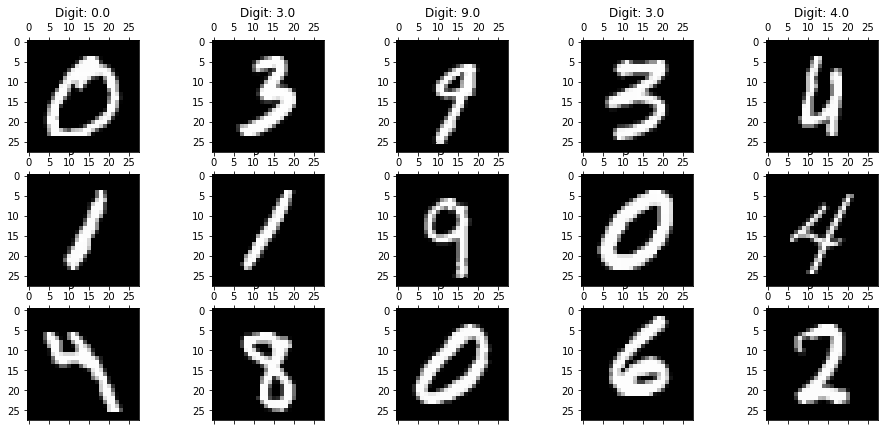

In [14]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0]) # 전체 개수 중에 일부 출력

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

In [20]:
# 전체 데이터의 평균 확인
df.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0,70000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0,4.452429
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0,2.890195
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0,9.000000


max값이 255에 가까운 값이므로 스케일링이 필요하다.

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
pd.DataFrame(scaled_X).describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.744586e-18,4.872293e-18,3.248195e-18,-1.015061e-18,2.233134e-18,2.385393e-18,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.295091e-02,-2.338733e-02,-1.675050e-02,-1.063784e-02,-8.339086e-03,-5.342334e-03,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.295091e-02,-2.338733e-02,-1.675050e-02,-1.063784e-02,-8.339086e-03,-5.342334e-03,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.295091e-02,-2.338733e-02,-1.675050e-02,-1.063784e-02,-8.339086e-03,-5.342334e-03,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.295091e-02,-2.338733e-02,-1.675050e-02,-1.063784e-02,-8.339086e-03,-5.342334e-03,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.236282e+01,5.965323e+01,9.086908e+01,1.619808e+02,1.634635e+02,1.932091e+02,0.0,0.0,0.0,0.0


데이터 값이 올바르게 정리되지 않은 것 같다.

[이 글](https://stackoverflow.com/questions/63746182/correct-way-of-normalizing-and-scaling-the-mnist-dataset) 에 따르면 MNIST 데이터와 같은 이미지의 경우에는 음수 픽셀이 존재하면 안 되므로, StandardScale 보다는 단순히 255로 나누는 스케일링이 필요하다.

In [53]:
scaled_X = X / 255.0 # 이미지 스케일링

Y 데이터는 10개의 라벨로 이루어져 있는데, 데이터 간 잘못된 상관관계를 만들 우려가 있어서 one-hot 인코딩 형태로 변환했다.

In [26]:
# one_hot_y = pd.get_dummies(df['y'])
# one_hot_y.head()

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [136]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.2, random_state=42)

In [118]:
print(f"shape of X_train : {X_train.shape}\nshape of X_test : {X_test.shape}\nshape of y_train : {y_train.shape}\nshape of y_test : {y_test.shape}\n")

shape of X_train : (56000, 784)
shape of X_test : (14000, 784)
shape of y_train : (56000, 1)
shape of y_test : (14000, 1)



### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!<br>
강의에서 배웠던 3가지 중 어떤 걸 고려해서 갯수를 정했는지요!!!!<br>
scree plot같은거는 직접 그려서 확인해주면 좋겠죠???

#### 추가 : PCA의 고유값 개수

강의에서 배웠던 주성분을 정하는 방법은 다음과 같다.
- Elbow point method : Factor_number 에 따른 고유값의 크기로 그래프를 그렸을 때 고유값의 크기가 급격히 감소하는 지점 (Elbow Point)에서 선택)
- Kaiser's Rule : 고유값이 1이상인 주성분들만 선택
- 누적설명률이 70 ~ 80 % 이상인 지점에서 선택

누적 설명률이란?
- 누적 기여율이라고도 한다.
- 전체 고유값 중 해당 고유값이 전체를 얼마나 설명하는지를 나타내는 변수라고 볼 수 있을 것 같다.
- 주로 아래와 같은 공식으로 계산된다.
![누적 기여율](https://blog.kakaocdn.net/dn/2DViq/btqDrkPgxdK/HDToKix0c8yJgopFjkPBjK/img.png)

In [140]:
from sklearn.decomposition import PCA

#### 1. Elbow Point 를 확인

In [11]:
pca = PCA(n_components=X.shape[1], copy=False)
pca_x = pca.fit_transform(X_train)
pca_x

array([[-2.26354800e+00,  6.49285157e-02,  1.59845569e+00, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-1.84107409e+00,  2.40213821e+00, -1.39673437e+00, ...,
         1.54517593e-17, -8.95520214e-16,  9.99723956e-17],
       [-2.69305892e+00, -2.60832456e-01, -8.48167834e-01, ...,
        -1.95394493e-15, -2.01273649e-15,  7.56042921e-18],
       ...,
       [-4.64508520e-01,  2.06200296e+00, -1.61615420e+00, ...,
         1.35710925e-18, -3.00348995e-18,  4.53579614e-19],
       [ 6.75567609e+00, -2.40366807e+00,  2.26744664e+00, ...,
         1.26971051e-17,  1.28687497e-17, -1.54383579e-18],
       [ 2.68365562e-01, -2.72796395e-01, -7.63535496e-01, ...,
        -5.06258117e-18, -2.52261875e-18, -3.07279670e-18]])

In [12]:
# explained_variance_ 를 사용해 설명 변수(고유값을 확인할 수 있다.)
exv = pca.explained_variance_
exv.shape

(784,)

In [38]:
exv[:5] # 크기순으로 정렬된 것을 확인할 수 있다.

array([5.14506678, 3.77649087, 3.23914747, 2.85546   , 2.57863563])

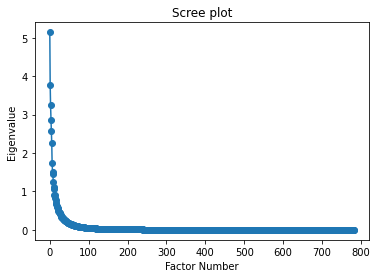

In [43]:
plt.title("Scree plot")
plt.plot(np.arange(exv.shape[0]), exv, marker='o')
plt.xlabel("Factor Number")
plt.ylabel("Eigenvalue")
plt.show()

데이터가 너무 많아 제대로 확인되지 않는다.
확인 결과, Factor Number 가 15이 되기 전에 Elbow point 가 발견되었으므로 그 부분만 따로 표시해 보았다.

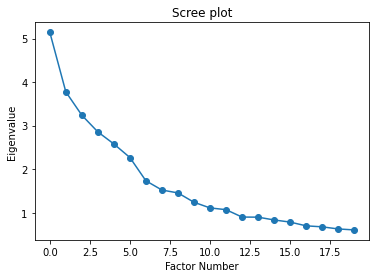

In [49]:
plt.title("Scree plot")
plt.plot(np.arange(exv[:20].shape[0]), exv[:20], marker='o') # 80개만 표시
plt.xlabel("Factor Number")
plt.ylabel("Eigenvalue")
plt.show()

Factor Number 가 12가 되는 위치에서 Elbow Point가 관측되었다.

#### 2. Kaiser's Rule

고유값이 1 이상인 데이터만 표시해 보았다.

In [53]:
exv[exv >= 1].shape # 고유값이 1이상인 데이터만 표시 후 길이를 측정해 본다.

(12,)

12로 나타났다.

#### 누적설명률(누적기여율)이 70~80인 지점으로

In [54]:
pca = PCA(n_components=0.80, copy=False) # 80% 지점 # n_components 에 실수를 주면 누적설명률을 기준으로 pca를 할 수 있다.
pca_x = pca.fit_transform(X_train)
exv = pca.explained_variance_
exv.shape

(43,)

In [55]:
pca = PCA(n_components=0.7, copy=False) # 70% 지점
pca_x = pca.fit_transform(X_train)
exv = pca.explained_variance_
exv.shape

(26,)

누적설명률을 기준으로 하면 43 ~ 26개의 고유값을 가질 때 누적설명률이 70~80%로 나타났다.

### 추가 : LDA

LDA는 데이터를 특정 축에 projection 한 후 데이터를 가장 잘 구분하는 직선을 찾아낸다.

projection 한 데이터의 중심벡터와 분산을 찾아내 중심은 최대, 분산은 최소화 하는 벡터를 구한다.

사용 예시

In [55]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
lda_X = clf.fit_transform(X_train,y_train.reshape(-1)) # LDA 모듈은 one-hot을 받지 않기 때문에 y에서 y_train에 해당하는 부분만 사용.
lda_X.shape

(56000, 9)

In [66]:
# explained_variance_ratio_에 각 변수의 설명력을 구할 수 있다.
clf.explained_variance_ratio_

array([0.23708117, 0.20328823, 0.17798282, 0.10633489, 0.09415639,
       0.06896763, 0.04990535, 0.03507761, 0.02720591])

`shape` 를 통해 확인해 보니 총 9개의 변수로 축소시킨 것을 확인할 수 있다.

### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

`linear_model` 의 [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression),
`svm`의 [`SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html?highlight=svc#sklearn.svm.SVC),
`ensemble`의 [`AdaBoostClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier)
, [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)
, light
으로 확인하고, Stacking하여 최종적으로 판별해 보고자 한다.

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from lightgbm import LGBMClassifier
import time

from sklearn.metrics import accuracy_score

In [51]:
lr = LogisticRegression(max_iter=1000, random_state=42) # warnings 방지
svc = SVC(random_state = 42, max_iter=1000)
ada = AdaBoostClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
lgbm = LGBMClassifier(random_state=42)

# 모두 기본 파라미터로 학습

models = [lr, svc, ada, rf, lgbm]

In [60]:
# 원본 데이터로 네 모델 모두 학습 후 예측하는데 걸리는 시간 측정
start = time.time()

for model in models:
    model.fit(X_train, y_train.reshape(-1))
    print(f"model: {model.__class__()}, accuracy_score: {accuracy_score(y_test, model.predict(X_test))}")

end = time.time()

print("경과시간", end - start)

model: LogisticRegression(), accuracy_score: 0.9234285714285714


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


model: LinearSVC(), accuracy_score: 0.9157857142857143
model: AdaBoostClassifier(), accuracy_score: 0.7192857142857143
model: RandomForestClassifier(), accuracy_score: 0.969
model: LGBMClassifier(), accuracy_score: 0.977
경과시간 310.9980411529541


In [141]:
# pca 변환 (80%로 설명)
pca = PCA(n_components=0.80, copy=False)
pca_x = pca.fit_transform(X_train)

# LDA 변환
clf = LinearDiscriminantAnalysis()
lda_X = clf.fit_transform(X_train,y_train.reshape(-1)) # LDA 모듈은 one-hot을 받지 않기 때문에 y에서 y_train에 해당하는 부분만 사용.

In [142]:
# 테스트 데이터에 대한 변환
pca_test_X = pca.transform(X_test) # fit 하지않고 transform만 실시함
lda_test_X = clf.transform(X_test)

In [63]:
# pca 된 데이터로 네 모델 모두 학습 후 예측하는데 걸리는 시간 측정
start = time.time()

for model in models:
    model.fit(pca_x, y_train.reshape(-1))
    print(f"model: {model.__class__()}, accuracy_score: {accuracy_score(y_test, model.predict(pca_test_X))}")

end = time.time()

print("경과시간", end - start)

model: LogisticRegression(), accuracy_score: 0.905


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


model: LinearSVC(), accuracy_score: 0.8936428571428572
model: AdaBoostClassifier(), accuracy_score: 0.699
model: RandomForestClassifier(), accuracy_score: 0.9528571428571428
model: LGBMClassifier(), accuracy_score: 0.9657142857142857
경과시간 117.73004984855652


In [64]:
# lda 된 데이터로 네 모델 모두 학습 후 예측하는데 걸리는 시간 측정
start = time.time()

for model in models:
    model.fit(lda_X, y_train.reshape(-1))
    print(f"model: {model.__class__()}, accuracy_score: {accuracy_score(y_test, model.predict(lda_test_X))}")

end = time.time()

print("경과시간", end - start)

model: LogisticRegression(), accuracy_score: 0.8160714285714286


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


model: LinearSVC(), accuracy_score: 0.8052857142857143
model: AdaBoostClassifier(), accuracy_score: 0.7755714285714286
model: RandomForestClassifier(), accuracy_score: 0.8482142857142857
model: LGBMClassifier(), accuracy_score: 0.8322857142857143
경과시간 54.8597617149353


경과 시간의 경우 LDA > PCA > 변환 없음으로 나타났다. 차원이 축소되어 계산량이 확실히 줄었음을 확인할 수 있다.

특히 변환이 없을 때 300초가 걸린 것과 달리, 단순히 차원 축소만 실행했음에도 불구하고 계산 시간이 100초대로 줄어드는 둥 큰 변화를 보였다.

LDA 변환에서는 그 특징이 더 크게 나타났는데, 54초로 상당히 빨리 끝난 것을 확인할 수 있다.

정확도 면에서도 변환 없음 > PCA > LDA 순이었다.

PCA의 경우 설명력이 80% 지점에서 선택한 것으로, 대부분의 설명이 가능해서 차원을 축소하지 않은 데이터와 별 차이가 없었다.

LDA의 경우 차원이 낮으므로, 모델이 계산하기 어려웠던 것으로 것으로 추정된다.

## 모델 튜닝

위 4가지 모델의 하이퍼파라미터를 튜닝해서 사용한다.

로지스틱 회귀 모델은 파라미터가 존재하지 않아 튜닝하지 않겠다.

속도가 빠른 `optuna` 모듈을 사용하겠으며, 정확도와 속도를 모두 잡은 PCA된 데이터를 사용하여 튜닝하겠다.

In [67]:
import optuna # 속도가 빠른 하이퍼파라미터 튜닝 모듈

In [121]:
from sklearn.svm import SVC
# SVM 모델 튜닝
def svc_objective(trial):
    
    svc_c = trial.suggest_loguniform('svc_c', 1e-4, 1e4)
    classifier_obj = SVC(C=svc_c, random_state=42)
    
    classifier_obj.fit(pca_x, y_train.reshape(-1))
    accuracy = accuracy_score(y_test, classifier_obj.predict(pca_test_X))
    
    return accuracy

svm_study = optuna.create_study(direction='maximize')
svm_study.optimize(svc_objective, n_trials=100)
print(f"Best trial score : {svm_study.best_trial.value}\nBest Params: {svm_study.best_trial.params}")

[I 2021-03-02 09:00:23,915] A new study created in memory with name: no-name-a2eb8e94-4e60-4c6c-9e7a-0eab52915fe2
[I 2021-03-02 09:01:16,794] Trial 0 finished with value: 0.9877142857142858 and parameters: {'svc_c': 6.299588390377998}. Best is trial 0 with value: 0.9877142857142858.
[I 2021-03-02 09:02:09,397] Trial 1 finished with value: 0.9872857142857143 and parameters: {'svc_c': 243.37147977270402}. Best is trial 0 with value: 0.9877142857142858.
[I 2021-03-02 09:15:19,365] Trial 2 finished with value: 0.7089285714285715 and parameters: {'svc_c': 0.0010695715823228792}. Best is trial 0 with value: 0.9877142857142858.
[I 2021-03-02 09:16:14,667] Trial 3 finished with value: 0.9832857142857143 and parameters: {'svc_c': 1.025568771230862}. Best is trial 0 with value: 0.9877142857142858.
[I 2021-03-02 09:17:10,386] Trial 4 finished with value: 0.983 and parameters: {'svc_c': 0.9612417365328193}. Best is trial 0 with value: 0.9877142857142858.
[I 2021-03-02 09:17:56,481] Trial 5 finishe

[I 2021-03-02 10:23:15,340] Trial 45 finished with value: 0.9815714285714285 and parameters: {'svc_c': 0.6589333374538578}. Best is trial 31 with value: 0.9877857142857143.
[I 2021-03-02 10:24:11,043] Trial 46 finished with value: 0.9872857142857143 and parameters: {'svc_c': 1186.372258249802}. Best is trial 31 with value: 0.9877857142857143.
[I 2021-03-02 10:25:10,209] Trial 47 finished with value: 0.9872857142857143 and parameters: {'svc_c': 112.17911071043353}. Best is trial 31 with value: 0.9877857142857143.
[I 2021-03-02 10:26:03,958] Trial 48 finished with value: 0.9873571428571428 and parameters: {'svc_c': 36.05819294177693}. Best is trial 31 with value: 0.9877857142857143.
[I 2021-03-02 10:26:56,549] Trial 49 finished with value: 0.9875714285714285 and parameters: {'svc_c': 6.670190119058843}. Best is trial 31 with value: 0.9877857142857143.
[I 2021-03-02 10:28:44,843] Trial 50 finished with value: 0.9708571428571429 and parameters: {'svc_c': 0.1581562042608739}. Best is trial 

[I 2021-03-02 11:08:08,677] Trial 90 finished with value: 0.9872142857142857 and parameters: {'svc_c': 31.484654408792327}. Best is trial 80 with value: 0.9878571428571429.
[I 2021-03-02 11:09:05,141] Trial 91 finished with value: 0.9875 and parameters: {'svc_c': 13.00996238553574}. Best is trial 80 with value: 0.9878571428571429.
[I 2021-03-02 11:10:02,278] Trial 92 finished with value: 0.9877142857142858 and parameters: {'svc_c': 9.68347429801012}. Best is trial 80 with value: 0.9878571428571429.
[I 2021-03-02 11:10:59,288] Trial 93 finished with value: 0.9873571428571428 and parameters: {'svc_c': 25.32300865454852}. Best is trial 80 with value: 0.9878571428571429.
[I 2021-03-02 11:11:56,886] Trial 94 finished with value: 0.9876428571428572 and parameters: {'svc_c': 5.507461490668012}. Best is trial 80 with value: 0.9878571428571429.
[I 2021-03-02 11:12:55,710] Trial 95 finished with value: 0.9872857142857143 and parameters: {'svc_c': 229.87907252610265}. Best is trial 80 with value:

Best trial score : 0.9878571428571429
Best Params: {'svc_c': 14.971964747211656}


In [80]:
# AdaBoost 모델 튜닝
def ada_objective(trial):
    
    n_estimators = trial.suggest_int('n_estimators', 1, 100)
    lr = trial.suggest_loguniform('learning_rate', 1e-5, 1)
    
    classifier_obj = AdaBoostClassifier(n_estimators=n_estimators, learning_rate = lr, random_state=42)
    
    classifier_obj.fit(pca_x, y_train.reshape(-1))
    accuracy = accuracy_score(y_test, classifier_obj.predict(pca_test_X))
    
    return accuracy

ada_study = optuna.create_study(direction='maximize')
ada_study.optimize(ada_objective, n_trials=100)
print(f"Best trial score : {ada_study.best_trial_value}\nBest Params: {ada_study.best_trial.params}")

[I 2021-03-01 23:03:11,848] A new study created in memory with name: no-name-1e9a2577-fc05-4d1e-967c-cc80d39fb8fa
[I 2021-03-01 23:03:15,049] Trial 0 finished with value: 0.199 and parameters: {'n_estimators': 8, 'learning_rate': 0.00017296524855836635}. Best is trial 0 with value: 0.199.
[I 2021-03-01 23:03:45,046] Trial 1 finished with value: 0.199 and parameters: {'n_estimators': 82, 'learning_rate': 0.00011987396846828823}. Best is trial 0 with value: 0.199.
[I 2021-03-01 23:04:17,638] Trial 2 finished with value: 0.449 and parameters: {'n_estimators': 95, 'learning_rate': 0.006352295165948613}. Best is trial 2 with value: 0.449.
[I 2021-03-01 23:04:23,272] Trial 3 finished with value: 0.199 and parameters: {'n_estimators': 16, 'learning_rate': 1.3392632227063425e-05}. Best is trial 2 with value: 0.449.
[I 2021-03-01 23:04:35,920] Trial 4 finished with value: 0.7145 and parameters: {'n_estimators': 37, 'learning_rate': 0.8898328602815464}. Best is trial 4 with value: 0.7145.
[I 202

[I 2021-03-01 23:21:55,082] Trial 40 finished with value: 0.199 and parameters: {'n_estimators': 79, 'learning_rate': 3.5184464819589076e-05}. Best is trial 38 with value: 0.7405714285714285.
[I 2021-03-01 23:22:26,932] Trial 41 finished with value: 0.7425714285714285 and parameters: {'n_estimators': 85, 'learning_rate': 0.5273834026144911}. Best is trial 41 with value: 0.7425714285714285.
[I 2021-03-01 23:22:59,210] Trial 42 finished with value: 0.7416428571428572 and parameters: {'n_estimators': 83, 'learning_rate': 0.584827782063583}. Best is trial 41 with value: 0.7425714285714285.
[I 2021-03-01 23:23:30,553] Trial 43 finished with value: 0.742 and parameters: {'n_estimators': 83, 'learning_rate': 0.5832757192922455}. Best is trial 41 with value: 0.7425714285714285.
[I 2021-03-01 23:24:03,252] Trial 44 finished with value: 0.7438571428571429 and parameters: {'n_estimators': 83, 'learning_rate': 0.6522425727490734}. Best is trial 44 with value: 0.7438571428571429.
[I 2021-03-01 23:2

[I 2021-03-01 23:42:08,566] Trial 79 finished with value: 0.6584285714285715 and parameters: {'n_estimators': 66, 'learning_rate': 0.1516895911947742}. Best is trial 55 with value: 0.7631428571428571.
[I 2021-03-01 23:42:40,951] Trial 80 finished with value: 0.7298571428571429 and parameters: {'n_estimators': 85, 'learning_rate': 0.31149756675806334}. Best is trial 55 with value: 0.7631428571428571.
[I 2021-03-01 23:43:09,747] Trial 81 finished with value: 0.7532142857142857 and parameters: {'n_estimators': 81, 'learning_rate': 0.5071401052088045}. Best is trial 55 with value: 0.7631428571428571.
[I 2021-03-01 23:43:38,586] Trial 82 finished with value: 0.748 and parameters: {'n_estimators': 80, 'learning_rate': 0.5018429603625932}. Best is trial 55 with value: 0.7631428571428571.
[I 2021-03-01 23:44:08,833] Trial 83 finished with value: 0.7380714285714286 and parameters: {'n_estimators': 82, 'learning_rate': 0.719072605657323}. Best is trial 55 with value: 0.7631428571428571.
[I 2021-

AttributeError: 'Study' object has no attribute 'best_trial_value'

In [86]:
# 실수로 오류가 나서 아래 작성
print(f"Best trial score : {ada_study.best_trial.value}\nBest Params: {ada_study.best_trial.params}")

Best trial score : 0.7631428571428571
Best Params: {'n_estimators': 96, 'learning_rate': 0.6610069832017895}


In [84]:
# RandomForest 모델 튜닝
def rf_objective(trial):
    
    n_estimators = trial.suggest_int('n_estimators', 1, 100)
    depth = trial.suggest_int('max_depth', 1, 100)
    
    classifier_obj = RandomForestClassifier(n_estimators=n_estimators, max_depth=depth, random_state=42)
    
    classifier_obj.fit(pca_x, y_train.reshape(-1))
    accuracy = accuracy_score(y_test, classifier_obj.predict(pca_test_X))
    
    return accuracy

rf_study = optuna.create_study(direction='maximize')
rf_study.optimize(rf_objective, n_trials=100)
print(f"Best trial score : {rf_study.best_trial.value}\nBest Params: {rf_study.best_trial.params}")

[I 2021-03-02 00:07:16,046] A new study created in memory with name: no-name-56b38755-a97e-418d-a5aa-cbe2696f34af
[I 2021-03-02 00:07:56,222] Trial 0 finished with value: 0.9522857142857143 and parameters: {'n_estimators': 96, 'max_depth': 67}. Best is trial 0 with value: 0.9522857142857143.
[I 2021-03-02 00:07:57,272] Trial 1 finished with value: 0.6097857142857143 and parameters: {'n_estimators': 15, 'max_depth': 2}. Best is trial 0 with value: 0.9522857142857143.
[I 2021-03-02 00:08:02,234] Trial 2 finished with value: 0.9304285714285714 and parameters: {'n_estimators': 12, 'max_depth': 43}. Best is trial 0 with value: 0.9522857142857143.
[I 2021-03-02 00:08:09,710] Trial 3 finished with value: 0.9024285714285715 and parameters: {'n_estimators': 29, 'max_depth': 10}. Best is trial 0 with value: 0.9522857142857143.
[I 2021-03-02 00:08:46,283] Trial 4 finished with value: 0.9520714285714286 and parameters: {'n_estimators': 87, 'max_depth': 47}. Best is trial 0 with value: 0.9522857142

[I 2021-03-02 00:28:06,869] Trial 42 finished with value: 0.9377857142857143 and parameters: {'n_estimators': 100, 'max_depth': 13}. Best is trial 26 with value: 0.9539285714285715.
[I 2021-03-02 00:28:44,278] Trial 43 finished with value: 0.9523571428571429 and parameters: {'n_estimators': 89, 'max_depth': 40}. Best is trial 26 with value: 0.9539285714285715.
[I 2021-03-02 00:29:26,518] Trial 44 finished with value: 0.9537857142857142 and parameters: {'n_estimators': 100, 'max_depth': 30}. Best is trial 26 with value: 0.9539285714285715.
[I 2021-03-02 00:30:01,200] Trial 45 finished with value: 0.9527142857142857 and parameters: {'n_estimators': 83, 'max_depth': 32}. Best is trial 26 with value: 0.9539285714285715.
[I 2021-03-02 00:30:40,852] Trial 46 finished with value: 0.9545 and parameters: {'n_estimators': 95, 'max_depth': 28}. Best is trial 46 with value: 0.9545.
[I 2021-03-02 00:31:19,534] Trial 47 finished with value: 0.9535714285714286 and parameters: {'n_estimators': 94, 'ma

[I 2021-03-02 00:53:24,782] Trial 88 finished with value: 0.953 and parameters: {'n_estimators': 92, 'max_depth': 19}. Best is trial 46 with value: 0.9545.
[I 2021-03-02 00:53:54,220] Trial 89 finished with value: 0.9539285714285715 and parameters: {'n_estimators': 72, 'max_depth': 28}. Best is trial 46 with value: 0.9545.
[I 2021-03-02 00:54:30,432] Trial 90 finished with value: 0.9532142857142857 and parameters: {'n_estimators': 89, 'max_depth': 26}. Best is trial 46 with value: 0.9545.
[I 2021-03-02 00:55:05,365] Trial 91 finished with value: 0.9527142857142857 and parameters: {'n_estimators': 85, 'max_depth': 30}. Best is trial 46 with value: 0.9545.
[I 2021-03-02 00:55:37,809] Trial 92 finished with value: 0.9530714285714286 and parameters: {'n_estimators': 78, 'max_depth': 33}. Best is trial 46 with value: 0.9545.
[I 2021-03-02 00:56:17,258] Trial 93 finished with value: 0.9538571428571428 and parameters: {'n_estimators': 97, 'max_depth': 28}. Best is trial 46 with value: 0.9545.

Best trial score : 0.9545
Best Params: {'n_estimators': 95, 'max_depth': 28}


In [85]:
# LGBM 모델 튜닝
def lgbm_objective(trial):
    
    n_estimators = trial.suggest_int('n_estimators', 1, 100)
    depth = trial.suggest_int('depth', 1, 100)
    lr = trial.suggest_loguniform('learning_rate', 1e-5, 1)
    
    classifier_obj = LGBMClassifier(n_estimators=n_estimators, max_depth=depth, learning_rate = lr, random_state=42)
    
    classifier_obj.fit(pca_x, y_train.reshape(-1))
    accuracy = accuracy_score(y_test, classifier_obj.predict(pca_test_X))
    
    return accuracy

lgbm_study = optuna.create_study(direction='maximize')
lgbm_study.optimize(lgbm_objective, n_trials=100)
print(f"Best trial score : {lgbm_study.best_trial.value}\nBest Params: {lgbm_study.best_trial.params}")

[I 2021-03-02 00:59:49,244] A new study created in memory with name: no-name-c91ac2e7-0e8c-4226-abb8-bf6fc5c892bc


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 00:59:50,752] Trial 0 finished with value: 0.4198571428571429 and parameters: {'n_estimators': 28, 'depth': 17, 'learning_rate': 0.0005273079747056392}. Best is trial 0 with value: 0.4198571428571429.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 00:59:54,486] Trial 1 finished with value: 0.9525714285714286 and parameters: {'n_estimators': 66, 'depth': 26, 'learning_rate': 0.07867314747781834}. Best is trial 1 with value: 0.9525714285714286.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 00:59:55,942] Trial 2 finished with value: 0.11292857142857143 and parameters: {'n_estimators': 27, 'depth': 39, 'learning_rate': 2.559209848515842e-05}. Best is trial 1 with value: 0.9525714285714286.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 00:59:59,233] Trial 3 finished with value: 0.11292857142857143 and parameters: {'n_estimators': 62, 'depth': 43, 'learning_rate': 0.00010640815219976832}. Best is trial 1 with value: 0.9525714285714286.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:00:01,175] Trial 4 finished with value: 0.11292857142857143 and parameters: {'n_estimators': 40, 'depth': 75, 'learning_rate': 5.41196624270502e-05}. Best is trial 1 with value: 0.9525714285714286.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:00:04,117] Trial 5 finished with value: 0.4067142857142857 and parameters: {'n_estimators': 68, 'depth': 39, 'learning_rate': 0.8318663675970789}. Best is trial 1 with value: 0.9525714285714286.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:00:08,028] Trial 6 finished with value: 0.9122857142857143 and parameters: {'n_estimators': 76, 'depth': 18, 'learning_rate': 0.02053768000144246}. Best is trial 1 with value: 0.9525714285714286.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:00:10,500] Trial 7 finished with value: 0.11292857142857143 and parameters: {'n_estimators': 58, 'depth': 71, 'learning_rate': 2.3821538003624142e-05}. Best is trial 1 with value: 0.9525714285714286.
[I 2021-03-02 01:00:13,853] Trial 8 finished with value: 0.8919285714285714 and parameters: {'n_estimators': 97, 'depth': 4, 'learning_rate': 0.023196507609275177}. Best is trial 1 with value: 0.9525714285714286.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:00:17,521] Trial 9 finished with value: 0.9675 and parameters: {'n_estimators': 65, 'depth': 69, 'learning_rate': 0.3107884171606716}. Best is trial 9 with value: 0.9675.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:00:21,864] Trial 10 finished with value: 0.7551428571428571 and parameters: {'n_estimators': 96, 'depth': 100, 'learning_rate': 0.4809650422568205}. Best is trial 9 with value: 0.9675.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:00:26,440] Trial 11 finished with value: 0.9612857142857143 and parameters: {'n_estimators': 83, 'depth': 66, 'learning_rate': 0.09367589667591919}. Best is trial 9 with value: 0.9675.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:00:31,446] Trial 12 finished with value: 0.9687857142857143 and parameters: {'n_estimators': 84, 'depth': 69, 'learning_rate': 0.1943371799057531}. Best is trial 12 with value: 0.9687857142857143.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:00:35,605] Trial 13 finished with value: 0.8684285714285714 and parameters: {'n_estimators': 86, 'depth': 95, 'learning_rate': 0.0036991313994321575}. Best is trial 12 with value: 0.9687857142857143.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:00:35,938] Trial 14 finished with value: 0.7907142857142857 and parameters: {'n_estimators': 1, 'depth': 83, 'learning_rate': 0.28611167441665897}. Best is trial 12 with value: 0.9687857142857143.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:00:38,020] Trial 15 finished with value: 0.2792142857142857 and parameters: {'n_estimators': 48, 'depth': 56, 'learning_rate': 0.9740274018325301}. Best is trial 12 with value: 0.9687857142857143.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:00:42,744] Trial 16 finished with value: 0.8723571428571428 and parameters: {'n_estimators': 100, 'depth': 60, 'learning_rate': 0.003748599271711882}. Best is trial 12 with value: 0.9687857142857143.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:00:47,076] Trial 17 finished with value: 0.965 and parameters: {'n_estimators': 75, 'depth': 84, 'learning_rate': 0.1362534009498021}. Best is trial 12 with value: 0.9687857142857143.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:00:51,614] Trial 18 finished with value: 0.9157857142857143 and parameters: {'n_estimators': 88, 'depth': 84, 'learning_rate': 0.01952143347898838}. Best is trial 12 with value: 0.9687857142857143.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:00:53,928] Trial 19 finished with value: 0.6707142857142857 and parameters: {'n_estimators': 52, 'depth': 52, 'learning_rate': 0.0004467010515217121}. Best is trial 12 with value: 0.9687857142857143.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:00:58,437] Trial 20 finished with value: 0.9436428571428571 and parameters: {'n_estimators': 76, 'depth': 64, 'learning_rate': 0.046391312953608724}. Best is trial 12 with value: 0.9687857142857143.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:01:02,963] Trial 21 finished with value: 0.9683571428571428 and parameters: {'n_estimators': 74, 'depth': 89, 'learning_rate': 0.2334563682255144}. Best is trial 12 with value: 0.9687857142857143.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:01:07,045] Trial 22 finished with value: 0.9659285714285715 and parameters: {'n_estimators': 71, 'depth': 92, 'learning_rate': 0.19782238362123544}. Best is trial 12 with value: 0.9687857142857143.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:01:10,229] Trial 23 finished with value: 0.819 and parameters: {'n_estimators': 85, 'depth': 76, 'learning_rate': 0.5140103707087532}. Best is trial 12 with value: 0.9687857142857143.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:01:13,079] Trial 24 finished with value: 0.8815 and parameters: {'n_estimators': 55, 'depth': 90, 'learning_rate': 0.010357949922466221}. Best is trial 12 with value: 0.9687857142857143.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:01:18,404] Trial 25 finished with value: 0.9703571428571428 and parameters: {'n_estimators': 91, 'depth': 71, 'learning_rate': 0.2698089915882204}. Best is trial 25 with value: 0.9703571428571428.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:01:24,019] Trial 26 finished with value: 0.9511428571428572 and parameters: {'n_estimators': 100, 'depth': 79, 'learning_rate': 0.04745933891767861}. Best is trial 25 with value: 0.9703571428571428.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:01:27,059] Trial 27 finished with value: 0.157 and parameters: {'n_estimators': 90, 'depth': 99, 'learning_rate': 0.8119692342156406}. Best is trial 25 with value: 0.9703571428571428.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:01:31,373] Trial 28 finished with value: 0.9657857142857142 and parameters: {'n_estimators': 80, 'depth': 50, 'learning_rate': 0.1483923177331262}. Best is trial 25 with value: 0.9703571428571428.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:01:35,682] Trial 29 finished with value: 0.8212142857142857 and parameters: {'n_estimators': 90, 'depth': 88, 'learning_rate': 0.0010850968301211014}. Best is trial 25 with value: 0.9703571428571428.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:01:40,699] Trial 30 finished with value: 0.9566428571428571 and parameters: {'n_estimators': 92, 'depth': 74, 'learning_rate': 0.06376141277992002}. Best is trial 25 with value: 0.9703571428571428.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:01:43,484] Trial 31 finished with value: 0.8672142857142857 and parameters: {'n_estimators': 63, 'depth': 67, 'learning_rate': 0.3397687325743653}. Best is trial 25 with value: 0.9703571428571428.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:01:47,685] Trial 32 finished with value: 0.9677142857142857 and parameters: {'n_estimators': 71, 'depth': 60, 'learning_rate': 0.23219782136725112}. Best is trial 25 with value: 0.9703571428571428.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:01:51,776] Trial 33 finished with value: 0.9645 and parameters: {'n_estimators': 79, 'depth': 61, 'learning_rate': 0.12704521888596457}. Best is trial 25 with value: 0.9703571428571428.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:01:55,472] Trial 34 finished with value: 0.8872142857142857 and parameters: {'n_estimators': 72, 'depth': 47, 'learning_rate': 0.010020968436897303}. Best is trial 25 with value: 0.9703571428571428.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:01:57,131] Trial 35 finished with value: 0.8345714285714285 and parameters: {'n_estimators': 36, 'depth': 30, 'learning_rate': 0.6289841954564741}. Best is trial 25 with value: 0.9703571428571428.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:02:01,935] Trial 36 finished with value: 0.9686428571428571 and parameters: {'n_estimators': 82, 'depth': 56, 'learning_rate': 0.21939166699046306}. Best is trial 25 with value: 0.9703571428571428.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:02:07,031] Trial 37 finished with value: 0.9497142857142857 and parameters: {'n_estimators': 94, 'depth': 40, 'learning_rate': 0.0467917158926355}. Best is trial 25 with value: 0.9703571428571428.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:02:07,448] Trial 38 finished with value: 0.8583571428571428 and parameters: {'n_estimators': 6, 'depth': 31, 'learning_rate': 0.9634622294752128}. Best is trial 25 with value: 0.9703571428571428.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:02:12,344] Trial 39 finished with value: 0.9604285714285714 and parameters: {'n_estimators': 82, 'depth': 79, 'learning_rate': 0.0876879074389012}. Best is trial 25 with value: 0.9703571428571428.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:02:15,841] Trial 40 finished with value: 0.9175 and parameters: {'n_estimators': 60, 'depth': 54, 'learning_rate': 0.030945179893474756}. Best is trial 25 with value: 0.9703571428571428.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:02:19,783] Trial 41 finished with value: 0.9666428571428571 and parameters: {'n_estimators': 69, 'depth': 60, 'learning_rate': 0.1840929377801536}. Best is trial 25 with value: 0.9703571428571428.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:02:23,245] Trial 42 finished with value: 0.8882142857142857 and parameters: {'n_estimators': 77, 'depth': 45, 'learning_rate': 0.27672867160569625}. Best is trial 25 with value: 0.9703571428571428.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:02:26,434] Trial 43 finished with value: 0.8096428571428571 and parameters: {'n_estimators': 68, 'depth': 73, 'learning_rate': 0.520012736610167}. Best is trial 25 with value: 0.9703571428571428.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:02:31,133] Trial 44 finished with value: 0.9603571428571429 and parameters: {'n_estimators': 84, 'depth': 69, 'learning_rate': 0.08487169745010716}. Best is trial 25 with value: 0.9703571428571428.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:02:35,468] Trial 45 finished with value: 0.9686428571428571 and parameters: {'n_estimators': 74, 'depth': 58, 'learning_rate': 0.2885269367387618}. Best is trial 25 with value: 0.9703571428571428.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:02:39,351] Trial 46 finished with value: 0.7571428571428571 and parameters: {'n_estimators': 96, 'depth': 55, 'learning_rate': 0.3700418366340329}. Best is trial 25 with value: 0.9703571428571428.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:02:41,660] Trial 47 finished with value: 0.41114285714285714 and parameters: {'n_estimators': 45, 'depth': 48, 'learning_rate': 0.9461232399854873}. Best is trial 25 with value: 0.9703571428571428.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:02:45,147] Trial 48 finished with value: 0.9611428571428572 and parameters: {'n_estimators': 65, 'depth': 65, 'learning_rate': 0.11553227781840703}. Best is trial 25 with value: 0.9703571428571428.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:02:49,330] Trial 49 finished with value: 0.8912142857142857 and parameters: {'n_estimators': 82, 'depth': 71, 'learning_rate': 0.01030679472956937}. Best is trial 25 with value: 0.9703571428571428.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:02:52,399] Trial 50 finished with value: 0.8313571428571429 and parameters: {'n_estimators': 74, 'depth': 57, 'learning_rate': 0.448365414462051}. Best is trial 25 with value: 0.9703571428571428.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:02:57,427] Trial 51 finished with value: 0.9703571428571428 and parameters: {'n_estimators': 87, 'depth': 61, 'learning_rate': 0.2354189402181028}. Best is trial 25 with value: 0.9703571428571428.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:03:02,537] Trial 52 finished with value: 0.969 and parameters: {'n_estimators': 87, 'depth': 64, 'learning_rate': 0.1592013396441074}. Best is trial 25 with value: 0.9703571428571428.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:03:06,633] Trial 53 finished with value: 0.11292857142857143 and parameters: {'n_estimators': 88, 'depth': 63, 'learning_rate': 1.3829056552129393e-05}. Best is trial 25 with value: 0.9703571428571428.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:03:11,835] Trial 54 finished with value: 0.9596428571428571 and parameters: {'n_estimators': 99, 'depth': 57, 'learning_rate': 0.06795651127769356}. Best is trial 25 with value: 0.9703571428571428.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:03:16,635] Trial 55 finished with value: 0.9696428571428571 and parameters: {'n_estimators': 92, 'depth': 68, 'learning_rate': 0.18860290990420517}. Best is trial 25 with value: 0.9703571428571428.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:03:21,983] Trial 56 finished with value: 0.9317142857142857 and parameters: {'n_estimators': 92, 'depth': 78, 'learning_rate': 0.028617015296404282}. Best is trial 25 with value: 0.9703571428571428.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:03:26,661] Trial 57 finished with value: 0.9682857142857143 and parameters: {'n_estimators': 86, 'depth': 69, 'learning_rate': 0.15684377725508603}. Best is trial 25 with value: 0.9703571428571428.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:03:29,999] Trial 58 finished with value: 0.5151428571428571 and parameters: {'n_estimators': 96, 'depth': 67, 'learning_rate': 0.7851744228666482}. Best is trial 25 with value: 0.9703571428571428.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:03:34,476] Trial 59 finished with value: 0.9097857142857143 and parameters: {'n_estimators': 88, 'depth': 82, 'learning_rate': 0.017256805102054636}. Best is trial 25 with value: 0.9703571428571428.
[I 2021-03-02 01:03:37,166] Trial 60 finished with value: 0.16307142857142856 and parameters: {'n_estimators': 100, 'depth': 4, 'learning_rate': 9.955948864905275e-05}. Best is trial 25 with value: 0.9703571428571428.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:03:40,801] Trial 61 finished with value: 0.8724285714285714 and parameters: {'n_estimators': 78, 'depth': 51, 'learning_rate': 0.3010407356037059}. Best is trial 25 with value: 0.9703571428571428.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:03:46,072] Trial 62 finished with value: 0.965 and parameters: {'n_estimators': 92, 'depth': 63, 'learning_rate': 0.1052245100828065}. Best is trial 25 with value: 0.9703571428571428.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:03:51,017] Trial 63 finished with value: 0.9682857142857143 and parameters: {'n_estimators': 81, 'depth': 72, 'learning_rate': 0.18877959409872963}. Best is trial 25 with value: 0.9703571428571428.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:03:54,801] Trial 64 finished with value: 0.7552142857142857 and parameters: {'n_estimators': 85, 'depth': 59, 'learning_rate': 0.41753780747153496}. Best is trial 25 with value: 0.9703571428571428.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:03:58,422] Trial 65 finished with value: 0.6806428571428571 and parameters: {'n_estimators': 89, 'depth': 53, 'learning_rate': 0.5796598207822101}. Best is trial 25 with value: 0.9703571428571428.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:04:03,879] Trial 66 finished with value: 0.9707857142857143 and parameters: {'n_estimators': 94, 'depth': 76, 'learning_rate': 0.24875604547116803}. Best is trial 66 with value: 0.9707857142857143.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:04:08,702] Trial 67 finished with value: 0.9528571428571428 and parameters: {'n_estimators': 93, 'depth': 75, 'learning_rate': 0.05341324663019943}. Best is trial 66 with value: 0.9707857142857143.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:04:14,071] Trial 68 finished with value: 0.9672857142857143 and parameters: {'n_estimators': 97, 'depth': 69, 'learning_rate': 0.13712407143555497}. Best is trial 66 with value: 0.9707857142857143.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:04:15,566] Trial 69 finished with value: 0.9477142857142857 and parameters: {'n_estimators': 20, 'depth': 81, 'learning_rate': 0.23846462390512208}. Best is trial 66 with value: 0.9707857142857143.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:04:19,006] Trial 70 finished with value: 0.7399285714285714 and parameters: {'n_estimators': 85, 'depth': 87, 'learning_rate': 0.630072848200977}. Best is trial 66 with value: 0.9707857142857143.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:04:22,647] Trial 71 finished with value: 0.8475714285714285 and parameters: {'n_estimators': 80, 'depth': 64, 'learning_rate': 0.33210009058730455}. Best is trial 66 with value: 0.9707857142857143.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:04:28,027] Trial 72 finished with value: 0.97 and parameters: {'n_estimators': 94, 'depth': 58, 'learning_rate': 0.1897641198068159}. Best is trial 66 with value: 0.9707857142857143.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:04:33,285] Trial 73 finished with value: 0.9610714285714286 and parameters: {'n_estimators': 90, 'depth': 67, 'learning_rate': 0.0825095967479456}. Best is trial 66 with value: 0.9707857142857143.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:04:38,599] Trial 74 finished with value: 0.9685714285714285 and parameters: {'n_estimators': 94, 'depth': 76, 'learning_rate': 0.17641641613604278}. Best is trial 66 with value: 0.9707857142857143.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:04:43,761] Trial 75 finished with value: 0.9435714285714286 and parameters: {'n_estimators': 100, 'depth': 71, 'learning_rate': 0.03638183137561185}. Best is trial 66 with value: 0.9707857142857143.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:04:48,682] Trial 76 finished with value: 0.9652857142857143 and parameters: {'n_estimators': 88, 'depth': 61, 'learning_rate': 0.1107132417184424}. Best is trial 66 with value: 0.9707857142857143.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:04:52,731] Trial 77 finished with value: 0.8276428571428571 and parameters: {'n_estimators': 95, 'depth': 9, 'learning_rate': 0.37597298775004917}. Best is trial 66 with value: 0.9707857142857143.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:04:57,874] Trial 78 finished with value: 0.9695714285714285 and parameters: {'n_estimators': 91, 'depth': 63, 'learning_rate': 0.255875567077411}. Best is trial 66 with value: 0.9707857142857143.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:05:03,271] Trial 79 finished with value: 0.9589285714285715 and parameters: {'n_estimators': 98, 'depth': 63, 'learning_rate': 0.06593452767865222}. Best is trial 66 with value: 0.9707857142857143.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:05:08,256] Trial 80 finished with value: 0.9682142857142857 and parameters: {'n_estimators': 91, 'depth': 76, 'learning_rate': 0.15218772684261275}. Best is trial 66 with value: 0.9707857142857143.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:05:13,090] Trial 81 finished with value: 0.9697857142857143 and parameters: {'n_estimators': 84, 'depth': 66, 'learning_rate': 0.21348872964989726}. Best is trial 66 with value: 0.9707857142857143.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:05:18,425] Trial 82 finished with value: 0.9703571428571428 and parameters: {'n_estimators': 87, 'depth': 66, 'learning_rate': 0.2388004183843006}. Best is trial 66 with value: 0.9707857142857143.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:05:23,552] Trial 83 finished with value: 0.9691428571428572 and parameters: {'n_estimators': 87, 'depth': 67, 'learning_rate': 0.22822733116650268}. Best is trial 66 with value: 0.9707857142857143.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:05:27,304] Trial 84 finished with value: 0.31957142857142856 and parameters: {'n_estimators': 94, 'depth': 68, 'learning_rate': 0.7185167579137463}. Best is trial 66 with value: 0.9707857142857143.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:05:32,297] Trial 85 finished with value: 0.9686428571428571 and parameters: {'n_estimators': 84, 'depth': 73, 'learning_rate': 0.2582139421802137}. Best is trial 66 with value: 0.9707857142857143.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:05:37,577] Trial 86 finished with value: 0.9705 and parameters: {'n_estimators': 90, 'depth': 66, 'learning_rate': 0.22099086320081246}. Best is trial 66 with value: 0.9707857142857143.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:05:41,777] Trial 87 finished with value: 0.7983571428571429 and parameters: {'n_estimators': 91, 'depth': 61, 'learning_rate': 0.5098277294899826}. Best is trial 66 with value: 0.9707857142857143.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:05:46,339] Trial 88 finished with value: 0.7997857142857143 and parameters: {'n_estimators': 97, 'depth': 71, 'learning_rate': 0.4350310258786542}. Best is trial 66 with value: 0.9707857142857143.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:05:51,644] Trial 89 finished with value: 0.9644285714285714 and parameters: {'n_estimators': 94, 'depth': 78, 'learning_rate': 0.1000686736804121}. Best is trial 66 with value: 0.9707857142857143.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:05:55,754] Trial 90 finished with value: 0.7911428571428571 and parameters: {'n_estimators': 90, 'depth': 62, 'learning_rate': 0.0006845621120492268}. Best is trial 66 with value: 0.9707857142857143.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:06:00,865] Trial 91 finished with value: 0.9707142857142858 and parameters: {'n_estimators': 87, 'depth': 66, 'learning_rate': 0.2354593559143295}. Best is trial 66 with value: 0.9707857142857143.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:06:04,310] Trial 92 finished with value: 0.8298571428571428 and parameters: {'n_estimators': 83, 'depth': 65, 'learning_rate': 0.32030981177117873}. Best is trial 66 with value: 0.9707857142857143.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:06:09,193] Trial 93 finished with value: 0.9685714285714285 and parameters: {'n_estimators': 86, 'depth': 58, 'learning_rate': 0.19708695670279186}. Best is trial 66 with value: 0.9707857142857143.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:06:13,898] Trial 94 finished with value: 0.9637142857142857 and parameters: {'n_estimators': 79, 'depth': 55, 'learning_rate': 0.12389158803440438}. Best is trial 66 with value: 0.9707857142857143.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:06:19,314] Trial 95 finished with value: 0.9704285714285714 and parameters: {'n_estimators': 98, 'depth': 66, 'learning_rate': 0.25887852421515983}. Best is trial 66 with value: 0.9707857142857143.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:06:23,560] Trial 96 finished with value: 0.8093571428571429 and parameters: {'n_estimators': 98, 'depth': 66, 'learning_rate': 0.4049547238138512}. Best is trial 66 with value: 0.9707857142857143.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:06:29,180] Trial 97 finished with value: 0.9703571428571428 and parameters: {'n_estimators': 100, 'depth': 74, 'learning_rate': 0.18577688361858866}. Best is trial 66 with value: 0.9707857142857143.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:06:31,616] Trial 98 finished with value: 0.19092857142857142 and parameters: {'n_estimators': 100, 'depth': 74, 'learning_rate': 0.9538980849765596}. Best is trial 66 with value: 0.9707857142857143.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2021-03-02 01:06:36,778] Trial 99 finished with value: 0.9683571428571428 and parameters: {'n_estimators': 96, 'depth': 70, 'learning_rate': 0.1349887774820813}. Best is trial 66 with value: 0.9707857142857143.


Best trial score : 0.9707857142857143
Best Params: {'n_estimators': 94, 'depth': 76, 'learning_rate': 0.24875604547116803}


튜닝 결과 정확도는 다음과 같았다.
- SVM : 0.9878571428571429
- AdaBoost : 0.7631428571428571
- Random Forest : 0.9545
- LGBM : 0.9707857142857143

## Model Stacking

튜닝 결과 LGBM 모델의 정확도가 97% 로 상당히 높은 정확도이지만

Stacking 기법을 사용해 정확도를 조금 더 향상시킬 수 있는지 알아보려 한다.

In [122]:
# 현재 shape 출력
print(f"shape of X_train : {X_train.shape}\nshape of X_test : {X_test.shape}\nshape of y_train : {y_train.shape}\nshape of y_test : {y_test.shape}\n")

shape of X_train : (56000, 784)
shape of X_test : (14000, 784)
shape of y_train : (56000, 1)
shape of y_test : (14000, 1)



In [123]:
# Stacking 에 사용하기 위해 train 데이터를 다시 나눠야 한다.
# validation 과 test의 크기를 같게 하기 위해 train데이터를 3, validation을 1로 분할한다.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [124]:
# 현재 shape 출력
print(f"shape of X_train : {X_train.shape}\nshape of X_val : {X_val.shape}\nshape of y_train : {y_train.shape}\nshape of y_val : {y_val.shape}\n")


shape of X_train : (42000, 784)
shape of X_val : (14000, 784)
shape of y_train : (42000, 1)
shape of y_val : (14000, 1)



In [90]:
from vecstack import stacking # stacking 을 해 주는 모듈

In [125]:
# 개별 모델들 목록
lr = LogisticRegression(max_iter=5000, random_state=42)
svc = SVC(random_state = 42, C= 14.971964747211656, max_iter=1000)
ada = AdaBoostClassifier(random_state=42, n_estimators = 96, learning_rate= 0.6610069832017895)
rf = RandomForestClassifier(random_state=42, n_estimators= 95, max_depth= 28)
lgbm = LGBMClassifier(random_state=42, n_estimators= 94, max_depth= 76, learning_rate= 0.24875604547116803)

models = [lr, svc, ada, rf] # 4개 모델을 Stacking

# 최종 판독기
predModel = lgbm


# Stacking 모델 생성
s_train, s_test = stacking(
    models, 
    X_train, y_train, X_val, 
    regression=False, 
    n_folds=3,
    random_state = None,
    verbose=2,
    metric= accuracy_score
    )

predModel.fit(s_train, y_train) # 2차 예측모델 학습

prediction = predModel.predict(s_test) # 2번째 모델로 최종 결과값 예측

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


task:         [classification]
n_classes:    [10]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [4]

model  0:     [LogisticRegression]
    fold  0:  [0.91607143]
    fold  1:  [0.91678571]
    fold  2:  [0.91478571]
    ----
    MEAN:     [0.91588095] + [0.00082753]
    FULL:     [0.91588095]

model  1:     [SVC]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


    fold  0:  [0.97928571]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


    fold  1:  [0.97957143]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


    fold  2:  [0.97900000]
    ----
    MEAN:     [0.97928571] + [0.00023328]
    FULL:     [0.97928571]

model  2:     [AdaBoostClassifier]
    fold  0:  [0.76485714]
    fold  1:  [0.76900000]
    fold  2:  [0.75921429]
    ----
    MEAN:     [0.76435714] + [0.00401062]
    FULL:     [0.76435714]

model  3:     [RandomForestClassifier]
    fold  0:  [0.96200000]
    fold  1:  [0.96150000]
    fold  2:  [0.96078571]
    ----
    MEAN:     [0.96142857] + [0.00049830]
    FULL:     [0.96142857]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [126]:
print(f"accuracy_score: {accuracy_score(y_val, prediction)}")

accuracy_score: 0.98


Stacking 을 실시하여 정확도를 확인해 본 결과 0.98의 정확도를 보였다.

lgbm을 stacking 된 데이터에 다시 튜닝해서 결과를 조금 더 향상시켰다.

In [127]:
# Stacking 된 데이터로 lgbm 모델 튜닝
def lgbm_objective(trial):
    
    n_estimators = trial.suggest_int('n_estimators', 1, 100)
    depth = trial.suggest_int('depth', 1, 100)
    leaves = trial.suggest_int('leaves', 1, 100000)
    lr = trial.suggest_loguniform('learning_rate', 1e-5, 1)
    
    classifier_obj = LGBMClassifier(n_estimators=n_estimators, max_depth=depth, num_leaves=leaves, learning_rate = lr, random_state=42)
    
    classifier_obj.fit(s_train, y_train.reshape(-1))
    accuracy = accuracy_score(y_val, classifier_obj.predict(s_test))
    
    return accuracy

lgbm_study = optuna.create_study(direction='maximize')
lgbm_study.optimize(lgbm_objective, n_trials=100)
print(f"Best trial score : {lgbm_study.best_trial.value}\nBest Params: {lgbm_study.best_trial.params}")

[I 2021-03-02 11:42:53,114] A new study created in memory with name: no-name-e97ebd90-7f25-4f40-9e16-9b88f8725b26
[I 2021-03-02 11:43:04,153] Trial 0 finished with value: 0.8876428571428572 and parameters: {'n_estimators': 38, 'depth': 75, 'leaves': 38989, 'learning_rate': 0.0005832256736678494}. Best is trial 0 with value: 0.8876428571428572.
[I 2021-03-02 11:43:07,748] Trial 1 finished with value: 0.9810714285714286 and parameters: {'n_estimators': 11, 'depth': 48, 'leaves': 54784, 'learning_rate': 0.01781553514487793}. Best is trial 1 with value: 0.9810714285714286.
[I 2021-03-02 11:43:12,419] Trial 2 finished with value: 0.978 and parameters: {'n_estimators': 19, 'depth': 15, 'leaves': 97360, 'learning_rate': 0.0015441322217617844}. Best is trial 1 with value: 0.9810714285714286.
[I 2021-03-02 11:43:18,803] Trial 3 finished with value: 0.9806428571428571 and parameters: {'n_estimators': 33, 'depth': 55, 'leaves': 28953, 'learning_rate': 0.09846202869500548}. Best is trial 1 with va

[I 2021-03-02 11:54:17,338] Trial 34 finished with value: 0.9810714285714286 and parameters: {'n_estimators': 95, 'depth': 50, 'leaves': 39802, 'learning_rate': 0.0026731088112382966}. Best is trial 1 with value: 0.9810714285714286.
[I 2021-03-02 11:54:21,437] Trial 35 finished with value: 0.9810714285714286 and parameters: {'n_estimators': 65, 'depth': 13, 'leaves': 24909, 'learning_rate': 0.002336098033403173}. Best is trial 1 with value: 0.9810714285714286.
[I 2021-03-02 11:54:23,129] Trial 36 finished with value: 0.9810714285714286 and parameters: {'n_estimators': 63, 'depth': 9, 'leaves': 32486, 'learning_rate': 0.007136876160250207}. Best is trial 1 with value: 0.9810714285714286.
[I 2021-03-02 11:54:24,771] Trial 37 finished with value: 0.9810714285714286 and parameters: {'n_estimators': 57, 'depth': 10, 'leaves': 30756, 'learning_rate': 0.00883546134804558}. Best is trial 1 with value: 0.9810714285714286.
[I 2021-03-02 11:54:25,872] Trial 38 finished with value: 0.9810714285714

[I 2021-03-02 12:06:57,908] Trial 68 finished with value: 0.9810714285714286 and parameters: {'n_estimators': 62, 'depth': 20, 'leaves': 25517, 'learning_rate': 0.002323496068107836}. Best is trial 1 with value: 0.9810714285714286.
[I 2021-03-02 12:06:58,132] Trial 69 finished with value: 0.981 and parameters: {'n_estimators': 53, 'depth': 1, 'leaves': 34897, 'learning_rate': 0.018526975646749128}. Best is trial 1 with value: 0.9810714285714286.
[I 2021-03-02 12:07:14,394] Trial 70 finished with value: 0.9810714285714286 and parameters: {'n_estimators': 87, 'depth': 32, 'leaves': 53148, 'learning_rate': 0.0032653709372688533}. Best is trial 1 with value: 0.9810714285714286.
[I 2021-03-02 12:07:15,481] Trial 71 finished with value: 0.9810714285714286 and parameters: {'n_estimators': 65, 'depth': 8, 'leaves': 32132, 'learning_rate': 0.005856246117456259}. Best is trial 1 with value: 0.9810714285714286.
[I 2021-03-02 12:07:26,162] Trial 72 finished with value: 0.9810714285714286 and param

Best trial score : 0.9810714285714286
Best Params: {'n_estimators': 11, 'depth': 48, 'leaves': 54784, 'learning_rate': 0.01781553514487793}


In [128]:
predModel = LGBMClassifier(random_state=42, n_estimators= 82, max_depth= 53, learning_rate= 0.0011809564065541087)
predModel.fit(s_train, y_train)
prediction = predModel.predict(s_test)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [129]:
# 튜닝 후 정확도 (validation)
print(f"accuracy_score: {accuracy_score(y_val, prediction)}")

accuracy_score: 0.9810714285714286


In [150]:
# 튜닝 된 모델을 사용하여 다시 스태킹 후 결과값 확인
# 차후에 예측을 조금 더 편하게 하기 위해 StackingTransformer 사용.

from vecstack import StackingTransformer

lr = LogisticRegression(max_iter=5000, random_state=42)
svc = SVC(random_state = 42, C= 14.971964747211656, max_iter=1000)
ada = AdaBoostClassifier(random_state=42, n_estimators = 96, learning_rate= 0.6610069832017895)
rf = RandomForestClassifier(random_state=42, n_estimators= 95, max_depth= 28)
lgbm = LGBMClassifier(random_state=42, n_estimators= 82, max_depth= 53, learning_rate= 0.0011809564065541087)

# Initialize 1st level estimators
estimators = [('lr', lr), ('svc', svc), ('ada', ada), ('rf', rf)]
              
# Initialize StackingTransformer
stack = StackingTransformer(estimators, regression=False, verbose=2, random_state=None)

# Fit
stack = stack.fit(X_train, y_train)

# Get your stacked features
S_train = stack.transform(X_train)
S_test = stack.transform(X_test) # 여기서 데이터를 미리 분할해 놓고 차후에 사용한다.

predModel = LGBMClassifier(random_state=42, n_estimators= 82, max_depth= 53, learning_rate= 0.0011809564065541087)
predModel.fit(S_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


task:         [classification]
n_classes:    [10]
metric:       [accuracy_score]
variant:      [A]
n_estimators: [4]

estimator  0: [lr: LogisticRegression]
    fold  0:  [0.92492857]
    fold  1:  [0.91507143]
    fold  2:  [0.92050000]
    fold  3:  [0.91685714]
    ----
    MEAN:     [0.91933929] + [0.00377369]

estimator  1: [svc: SVC]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


    fold  0:  [0.98400000]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


    fold  1:  [0.98207143]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


    fold  2:  [0.98292857]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


    fold  3:  [0.98350000]
    ----
    MEAN:     [0.98312500] + [0.00071674]

estimator  2: [ada: AdaBoostClassifier]
    fold  0:  [0.78435714]
    fold  1:  [0.77350000]
    fold  2:  [0.78707143]
    fold  3:  [0.76921429]
    ----
    MEAN:     [0.77853571] + [0.00739924]

estimator  3: [rf: RandomForestClassifier]
    fold  0:  [0.96907143]
    fold  1:  [0.96435714]
    fold  2:  [0.96400000]
    fold  3:  [0.96521429]
    ----
    MEAN:     [0.96566071] + [0.00201802]

Train set was detected.
Transforming...

estimator  0: [lr: LogisticRegression]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE

estimator  1: [svc: SVC]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE

estimator  2: [ada: AdaBoostClassifier]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from f

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LGBMClassifier(learning_rate=0.0011809564065541087, max_depth=53,
               n_estimators=82, random_state=42)

### Voting 방법 테스트

In [151]:
# y_train이 변경되었으므로 다시 분할해주어야 한다.
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.2, random_state=42)

In [160]:
from sklearn.ensemble import VotingClassifier

lr = LogisticRegression(max_iter=5000, random_state=42)
svc = SVC(random_state = 42, C= 14.971964747211656, max_iter=10000, probability=True)
rf = RandomForestClassifier(random_state=42, n_estimators= 95, max_depth= 28)
lgbm = LGBMClassifier(random_state=42, n_estimators= 82, max_depth= 53, learning_rate= 0.0011809564065541087, probability=True)

votingModel = VotingClassifier(
    estimators=[('lr', lr), ('svc', svc), ('rf', rf), ('lgbm', lgbm)],
    voting='soft' # 모델이 잘 튜닝된 모델이므로 soft 방법을 사용
)

votingModel.fit(pca_x, y_train.reshape(-1))

prediction = votingModel.predict(pca_test_X)
print(f"accuracy_score: {accuracy_score(y_test, prediction)}")

[LightGBM] [Warning] Unknown parameter: probability
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
accuracy_score: 0.9770714285714286


## 최종 모델 성능

Stacking 된 모델과 튜닝 과정에서 가장 성능이 좋았던 모델인 SVC 모델, Voting 모델의 결과를 적어 두었다.

SVC 모델의 경우, 정확도가 0.98786 정도로 상당히 높게 나온 것을 확인할 수 있었다.

In [135]:
# 튜닝 후 stacking 의 test 데이터 정확도
prediction = predModel.predict(S_test)
print(f"accuracy_score: {accuracy_score(y_test, prediction)}")

accuracy_score: 0.982


In [158]:
# Voting 방법의 test 데이터 정확도
prediction = votingModel.predict(pca_test_X)
print(f"accuracy_score: {accuracy_score(y_test, prediction)}")

accuracy_score: 0.9770714285714286


In [149]:
# 튜닝 후 SVM의 test 데이터 정확도
predModel2 = SVC(C=14.971964747211656, random_state=42, max_iter=10000)
predModel2.fit(pca_x, y_train.reshape(-1))

prediction = predModel2.predict(pca_test_X)
print(f"accuracy_score: {accuracy_score(y_test, prediction)}")

accuracy_score: 0.9878571428571429


### 왜 LDA 보다 PCA의 데이터 정확도가 더 높았을까?

[이 글](https://kjwan4435.tistory.com/85) 에 따르면 데이터의 차이가 평균보다 분산에 더 있을 때 PCA가 효과적이라고 나와 있다.

MNIST 데이터는 모든 픽셀 값이 0~1 사이 이므로 각 숫자 클래스별로 평균 별 차이가 크지 않을 것으로 생각된다.

반면, 숫자의 모양에 따라 픽셀이 칠해진 위치가 다를 것이므로 분산은 클래스 별로 차이가 있을 것이라고 (직관에 의해) 추측된다.